In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('20200124_ews_observations.csv',sep=',',low_memory=False)

In [3]:
df.head()

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50.0000000,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44.0000000,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27.0000000,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27.0000000,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16.0000000,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171736 entries, 0 to 171735
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PatientId        171736 non-null  int64  
 1   ObservationDate  171736 non-null  object 
 2   EwsProcedure     171736 non-null  object 
 3   EWS_Total        171736 non-null  int64  
 4   SBP              160949 non-null  float64
 5   SBP_Score        160949 non-null  float64
 6   LOC              171736 non-null  object 
 7   LOC_Score        171736 non-null  int64  
 8   SpO2             171734 non-null  float64
 9   SpO2_Score       171734 non-null  float64
 10  Add_O2           171734 non-null  object 
 11  Add_O2_Score     171734 non-null  float64
 12  HR               171736 non-null  int64  
 13  HR_Score         171736 non-null  int64  
 14  RR               171736 non-null  int64  
 15  RR_Score         171736 non-null  int64  
 16  TEMP             171736 non-null  floa

In [5]:
df['LOC'].unique()

array(['ALERT', 'UNRESPONSIVE', 'NEW_CONFUSION', 'VOICE', 'PAIN'],
      dtype=object)

In [6]:
df.isnull().sum()

PatientId              0
ObservationDate        0
EwsProcedure           0
EWS_Total              0
SBP                10787
SBP_Score          10787
LOC                    0
LOC_Score              0
SpO2                   2
SpO2_Score             2
Add_O2                 2
Add_O2_Score           2
HR                     0
HR_Score               0
RR                     0
RR_Score               0
TEMP                   0
TEMP_Score             0
dtype: int64

In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.isnull().sum()

PatientId          0
ObservationDate    0
EwsProcedure       0
EWS_Total          0
SBP                0
SBP_Score          0
LOC                0
LOC_Score          0
SpO2               0
SpO2_Score         0
Add_O2             0
Add_O2_Score       0
HR                 0
HR_Score           0
RR                 0
RR_Score           0
TEMP               0
TEMP_Score         0
dtype: int64

In [9]:
df.columns

Index(['PatientId', 'ObservationDate', 'EwsProcedure', 'EWS_Total', 'SBP',
       'SBP_Score', 'LOC', 'LOC_Score', 'SpO2', 'SpO2_Score', 'Add_O2',
       'Add_O2_Score', 'HR', 'HR_Score', 'RR', 'RR_Score', 'TEMP',
       'TEMP_Score'],
      dtype='object')

In [10]:
x = df[['SBP',
       'LOC','SpO2',
       'HR','RR', 'TEMP']].values

In [11]:
y = df[['EWS_Total']].values

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [13]:
ct = ColumnTransformer(transformers=[('encoder',
                                     OneHotEncoder(),
                                     [1])],
                                     remainder='passthrough')

In [14]:
x = np.array(ct.fit_transform(x))

In [15]:
x[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 143.0, 96.0, 80, 18, 36.6], dtype=object)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [20]:
x_train[:,5:] = sc.fit_transform(x_train[:,5:])
x_test[:,5:] = sc.fit_transform(x_test[:,5:])

In [21]:
x_train

array([[1.0, 0.0, 0.0, ..., -0.788115166094505, -1.5871613822149686,
        0.2982515715716459],
       [1.0, 0.0, 0.0, ..., -1.0196378578885694, -0.07137240054298294,
        -0.6346706263800674],
       [1.0, 0.0, 0.0, ..., 0.36949829287581626, -0.07137240054298294,
        -1.5675928243317807],
       ...,
       [1.0, 0.0, 0.0, ..., -0.6723538201974729, -1.5871613822149686,
        -1.0078395055607448],
       [1.0, 0.0, 0.0, ..., 0.4273789658243323, -0.07137240054298294,
        0.8580048903426819],
       [1.0, 0.0, 0.0, ..., 1.2955890600520732, 0.5349431921258113,
        -0.07491730760903148]], dtype=object)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(x_test)

In [26]:
np.set_printoptions(precision=2)

In [27]:
y_pred

array([[0.75],
       [5.79],
       [0.73],
       ...,
       [2.01],
       [0.67],
       [2.08]])

In [28]:
y_test

array([[1],
       [8],
       [1],
       ...,
       [0],
       [0],
       [4]], dtype=int64)

In [29]:
np.concatenate((np.ceil(y_pred.reshape(len(y_pred),1)),
               y_test.reshape(len(y_test), 1)),1)

array([[1., 1.],
       [6., 8.],
       [1., 1.],
       ...,
       [3., 0.],
       [1., 0.],
       [3., 4.]])

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.41317005626679215

In [31]:
import matplotlib
data = matplotlib.dates.date2num(df['ObservationDate'])

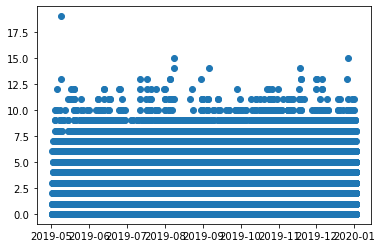

In [32]:
plt.plot_date(data,df.EWS_Total)

### DecisionTreeRegression

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
regressor = DecisionTreeRegressor(random_state=0)

In [35]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [36]:
y_predD = regressor.predict(x_test)

In [37]:
np.concatenate((np.ceil(y_predD.reshape(len(y_pred),1)),
               y_test.reshape(len(y_test), 1)),1)

array([[0., 1.],
       [9., 8.],
       [1., 1.],
       ...,
       [0., 0.],
       [0., 0.],
       [1., 4.]])

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predD)

0.42257814791426507

### Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
regr = RandomForestRegressor(n_estimators=10, random_state=0)

In [41]:
regr.fit(x_train,y_train.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

In [42]:
y_predR = regr.predict(x_test)

In [43]:
np.concatenate((np.ceil(y_predR.reshape(len(y_pred),1)),
               y_test.reshape(len(y_test), 1)),1)

array([[1., 1.],
       [8., 8.],
       [2., 1.],
       ...,
       [0., 0.],
       [1., 0.],
       [3., 4.]])

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predR)

0.6674047552524643

### Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
nb = GaussianNB()

In [48]:
model = nb.fit(x_train,y_train.ravel())

In [49]:
y_predN = model.predict(x_test)

In [50]:
np.concatenate((np.ceil(y_predN.reshape(len(y_pred),1)),
               y_test.reshape(len(y_test), 1)),1)

array([[0., 1.],
       [2., 8.],
       [1., 1.],
       ...,
       [0., 0.],
       [0., 0.],
       [2., 4.]])

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predN)

0.10253577307113326